### Regression to mean

A statistical phenomenon where extreme results(very high or low) tend to move closer to the average when measured again.

for example: A student who scores 100% on test1(likely due to skill + luck) might score 85% on test2(still great but less extreme)

Lets try to find Player with unusaully high G+A(goals+assist) in 2023/23 still maintain same track on 2023/23?

In [17]:
import pandas as pd
dataset=pd.read_csv('premier-player-23-24.csv')
dataset.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


Since Our data set doesnt consist Combined records row of two season(22/23,23/24) lets try to simulate 
and populate the combined seasons dataset

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate player performance data
np.random.seed(42)
players = [f'Player {i}' for i in range(100)]
season_1 = '2022/23'
season_2 = '2023/24'

# Generate data for 2 seasons
data = []

for player in players:
    skill = np.random.uniform(5, 20)  # base skill
    goals1 = skill + np.random.normal(0, 5)
    assists1 = skill/2 + np.random.normal(0, 3)
    
    goals2 = skill + np.random.normal(0, 5)
    assists2 = skill/2 + np.random.normal(0, 3)

    data.append([player, season_1, max(0, goals1), max(0, assists1)])
    data.append([player, season_2, max(0, goals2), max(0, assists2)])

# Create DataFrame
df = pd.DataFrame(data, columns=['Player', 'Season', 'Goals', 'Assists'])

df.head()

,Player,Season,Goals,Assists
0,Player 0,2022/23,5.058701,6.265757
1,Player 0,2023/24,12.013308,8.340597
2,Player 1,2022/23,13.273717,9.438224
3,Player 1,2023/24,13.304000,6.413355
4,Player 2,2022/23,0.000000,7.632926


In [28]:
# Add G+A
df['G+A'] = df['Goals'] + df['Assists']

# Pivot: Each player's G+A in both seasons
pivot_df = df.pivot(index='Player', columns='Season', values='G+A').dropna()
pivot_df.columns = ['G+A_2022_23', 'G+A_2023_24']

pivot_df.head()

,G+A_2022_23,G+A_2023_24
Player,,
Player 0,11.324459,20.353905
Player 1,22.711941,19.717355
Player 10,16.244654,17.407450
Player 11,4.042280,13.748957
Player 12,12.825395,18.149163


In [30]:

# Select top 5 players based on G+A in 2022/23
top_5 = pivot_df.sort_values('G+A_2022_23', ascending=False).head(5)

# --- Simple Bar Plot ---
players = top_5.index
g_a_2022 = top_5['G+A_2022_23'].values
g_a_2023 = top_5['G+A_2023_24'].values
x = range(len(players))  # [0, 1, 2, 3, 4]

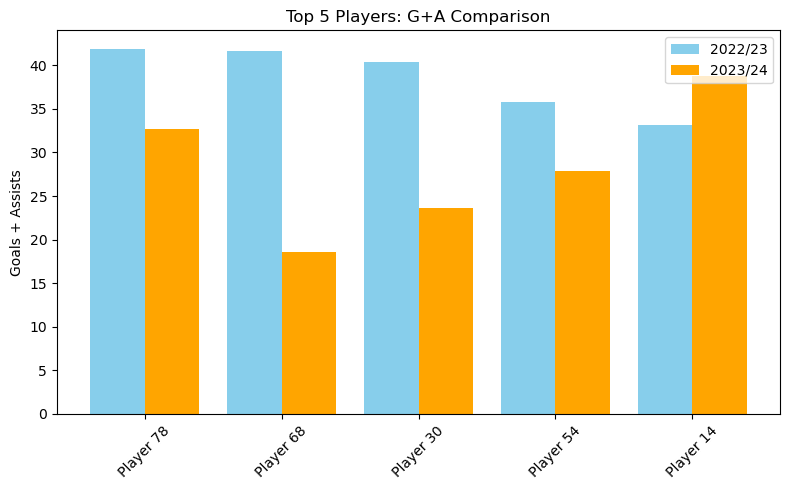

In [34]:

#plot
plt.figure(figsize=(8, 5))
plt.bar(x, g_a_2022, width=0.4, label='2022/23', align='center', color='skyblue')
plt.bar([i + 0.4 for i in x], g_a_2023, width=0.4, label='2023/24', align='center', color='orange')

plt.xticks([i + 0.2 for i in x], players, rotation=45)
plt.ylabel('Goals + Assists')
plt.title('Top 5 Players: G+A Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('C:/project/draft/Statistics_Project/Sampling_Bias_and_Mean_Reversion_in_Football_Analytics/visuals/Regression_to_mean.png')
plt.show()